# Controlling a Food Process with a PID Controller 
In this notebook, we will simulate a simplified food process and apply a PID controller to keep a controlled variable at a desired setpoint by changing a manipulated variable. The process explained here is the batch fermentation of malted barley into beer via a yeast fermentation reaction. This notebook was based on material developed for the University of Notre Dame course Chemical Process Control by Dr. Jeff Kantor, [Github](https://github.com/jckantor/CBE30338/tree/master).

In this process, a solution containing malted barley which has been enzymatically treated with native amylase to release simple sugars (called wort; this solution is assumed to be mainly glucose and water) is added with yeast cells into a [stirred jacketed tank](https://commons.wikimedia.org/wiki/File:Coflux_jacket.JPG). 

<div>
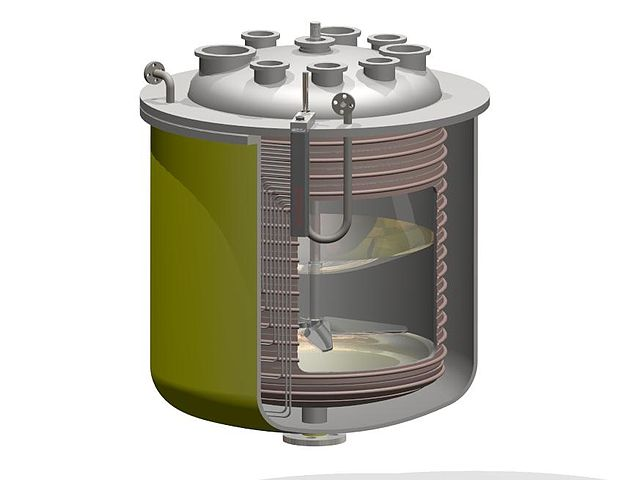
</div>

The glucose in the solution with initial concentration, $C_{G0}\ [mol \cdot L^{-1}]$ is converted into ethanol by the yeast following the reaction below: 
\begin{equation}
C_6 H_{12} O_6  \rightarrow  2 C_2 H_5 O H +  2 C O_2
\end{equation}

The reaction has a standard enthalpy of reaction, $\Delta H^{\theta}_R = -69\ kJ\cdot mol^{-1}$, and can be considered to have first-order kinetics where the concentration of glucose as a function of time, $C_G(t)$ follows the following behavior:
\begin{align*}
C_G(t) &= C_{G0} e^{-kt}\\
k(T) &= k_0 e^{\dfrac{-E_a}{RT}}
\end{align*}

From literature data ([Zhang 2006](https://pubmed.ncbi.nlm.nih.gov/16818413/)), the values for $k_0 = 2 \cdot 10^{10} \ min^{-1}$ and $E_a = 7.21 \cdot 10^{4} \ J \cdot mol^{-1}$ can be found if an Arrhenius temperature dependence of $k(T)$ is assumed.

Notably, the negative sign of the standard enthalpy of reaction indicates that this fermentation is highly exothermic, and will release heat as a by-product. For the production of beers, it is desirable to maintain the temperature within certain intervals to prevent the generation of undesirable esters and higher alcohols, prevent overgrowth resulting in incomplete substrate uptake, and prevent off-flavours due to cell death at high temperatures. At too low temperatures, cells will not be able to grow and will produce ethanol too slowly, making the fermentation too long to be economically feasible. For lager beers (e.g., Stella Artois), this temperature optimum lies within $7-13 ^\circ C$. Therefore, it is important for beer manufaturers to be able to keep the reactor temperature in control during the fermentation process which can take up to several days.

In order to simulate the fermentation, we model the system mass and energy balances to get a system of linear ordinary differential equations. 
### a) Mass balance
Since this is a batch bioreactor, a mass balance over the glucose concentration takes the following form:

\begin{align*}
Accumulation &= Mass\ flow\ in - Mass\ flow\ out - Consumption \\
Accumulation &= 0 - 0 - Consumption\\
V\dfrac{dC_G}{dt} &= -V \cdot k(T) \cdot C_G 
\end{align*}

Where $V$ is the tank volume, $C_G$ is the glucose concentration, and $k(T)$ is the first-order temperature dependent rate constant. From the stoichiometry of the reaction, the rate of production of ethanol is $\dfrac{dC_E}{dt} = -2 \dfrac{dC_G}{dt}$.

### b) Energy balance of tank contents
Since this is a batch bioreactor, no enthalpy is flowing in or out since there are no in or out streams. The energy balance of the solution inside of the tank is the following:
\begin{align*}
Accumulation &= Enthalpy\ flow\ in - Enthalpy\ flow\ out + Heat\ generation - Active\ cooling\ duty \\
Accumulation &= 0 - 0 + Heat\ generation - Active\ cooling\ duty\\
\rho \cdot C_p \cdot V  \cdot \dfrac{dT}{dt} &= -\Delta H^{\theta}_R \cdot V \cdot k(T) \cdot C_G + U \cdot A \cdot (T_c - T)
\end{align*}

### c) Energy balance of jacket contents
The jacket in charge of actively cooling the tank can be thought of as a well-mixed tank with inlet and outlet flow of cooling water. The cooling water removes heat from the tank and then flows out. The energy balance of the water inside the jacket is the following:
\begin{align*}
Accumulation &= Enthalpy\ flow\ in - Enthalpy\ flow\ out + Heat\ generation + Active\ cooling\ duty \\
Accumulation &= Enthalpy\ flow\ in - Enthalpy\ flow\ out + 0 + Active\ cooling\ duty\\
\rho \cdot C_p \cdot V_c  \cdot \dfrac{dT_c}{dt} &= q_c \cdot \rho \cdot Cp \cdot T_{ci} - q_c \cdot \rho \cdot Cp \cdot T_{c} + U \cdot A \cdot (T - T_c) \\
\rho \cdot C_p \cdot V_c  \cdot \dfrac{dT_c}{dt} &= q_c \cdot \rho \cdot Cp \cdot (T_{ci} - T_{c}) + U \cdot A \cdot (T - T_c)
\end{align*}
### d) Setting up the system of equations & constant definitions
If we rearrange the equations such that the derivative terms are on the left-hand side, we get a system of first order ordinary differential equations which can be solved:
\begin{align*}
\frac{dC_G}{dt} & = - k(T) \cdot C_G\\
\frac{dC_E}{dt} & = - 2 \cdot k(T) \cdot C_G\\
\frac{dT}{dt} & = \frac{-\Delta H^{\theta}_R}{\rho C_p} \cdot k(T) \cdot C_G + \frac{UA}{\rho C_pV} \cdot (T_c - T)\\
\frac{dT_c}{dt} & = \frac{q_c}{V_c}(T_{ci}-T_c) + \frac{UA}{\rho C_pV_c}\cdot(T - T_c)
\end{align*}

| Quantity | Symbol | Value | Units |
| :------- | :----: | :---: | :---- |
| Activation Energy | $E_a$ | 72,100 | J/mol |
| Arrehnius pre-exponential | $k_0$ | 1.21 x 10<sup>12</sup> | 1/hr |
| Gas Constant | $R$ | 8.314 | J/mol/K |
| Reactor Volume | $V$ | 100 | liters |
| Density | $\rho$ | 1000 | g/liter |
| Specific Heat Capacity of water | $C_p$ | 4.184 | J/g/K |
| Enthalpy of Reaction | $\Delta H_r$ | -69,000 | J/mol |
| Heat Transfer Coefficient | $UA$ | 3 x 10<sup>6</sup> | J/hr/K |
| Initial temperature of wort| $T_0$ | 293 | K |
| Initial glucose concentration | $C_{G,0}$ | 90 | g/L |
| Coolant inlet temperature (cold water) | $T_{ci}$ | 278 | K |
| Nominal coolant flowrate | $q_c$ | 0-3000 | L/hr |
| Cooling jacket volume | $V_c$ | 20 | liters |

## Question 1
### 1a)
For the process described above, what is the process control problem? Identify the process variable that needs to be controlled (CV) and the manipulated process variable (MV) that should be used. 
### 1b) 
Describe the control loop that engineers should install in order to measure the CV and actuate the MV. 

## Simulating a batch fermented with varying amounts of cooling
Here, we show how the reaction kinetics proceed when the system is allowed to run at constant coolant flowrates.

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from scipy.integrate import odeint
import seaborn as sns
sns.set_context('notebook')

Ea  = 72100     # activation energy J/gmol
R   = 8.314     # gas constant J/gmol/K
k0  = 1.21e12   # Arrhenius rate constant 1/hour
V   = 100.0     # Volume [L]
rho = 1000.0    # Density [g/L]
Cp  = 4.184     # Heat capacity [J/g/K]
dHr = -6.9e4    # Enthalpy of reaction [J/mol]
UA  = 3e6       # Heat transfer [J/hr/K]
C_G0 = 90/180 # Initial glucose concentration [g/L]/[g/mol] = [mol/L]
C_E0 = 0        # Initial ethanol concentration [mol/L]
T0  = 273.15 + 20.0    # Initial temperature [K]
Tci = 278.0     # Coolant feed temperature [K]
qc = 3e3        # Nominal coolant flowrate [L/hr]
Vc = 10.0       # Cooling jacket volume

# Arrhenius rate expression
def k(T):
    return k0*np.exp(-Ea/R/T)

def deriv(X,t):
    C_G,C_E,T,Tc = X
    dC_G = - k(T)*C_G
    dC_E = 2*k(T)*C_G
    dT = (-dHr/rho/Cp)*k(T)*C_G + (UA/V/rho/Cp)*(Tc - T)
    dTc = (qc/Vc)*(Tci - Tc) + (UA/Vc/rho/Cp)*(T - Tc)
    return [dC_G,dC_E,dT,dTc]

In [2]:
# visualization
def plotReactor(t,X):
    plt.subplot(1,3,1)
    plt.plot(t,X[:,0])
    plt.xlabel('Time [hr]')
    plt.ylabel(r'$C_G\ [mol/L]$')
    plt.ylim(0,1)
    
    plt.subplot(1,3,2)
    plt.plot(t,X[:,1])
    plt.xlabel('Time [hr]')
    plt.ylabel(r'$C_E\ [mol/L]$')
    plt.ylim(0,1)

    plt.subplot(1,3,3)
    plt.plot(t,X[:,2])
    plt.xlabel('Time [hr]')
    plt.ylabel('Tank temperature [K]');
    plt.ylim(273,300)

    plt.tight_layout()
    plt.show()

C:\Users\calde010\AppData\Local\Temp\ipykernel_9952\367666158.py:21: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


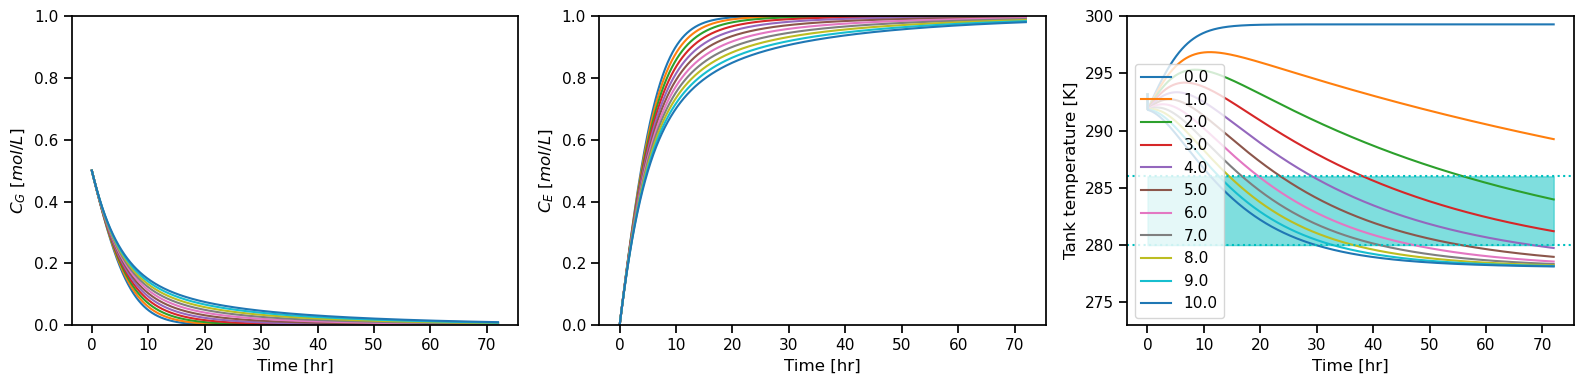

In [3]:
IC = [C_G0,C_E0,T0,Tci]                  # initial condition
t = np.linspace(0,72,2000)             # simulation time grid

qList = np.linspace(0,10,11)

plt.figure(figsize=(16,4))              # setup figure 
for qc in qList:                        # for each flowrate q_c
    X = odeint(deriv,IC,t)              # perform simulation
    plotReactor(t,X)                    # plot the results
plt.axhline(y=286,color='c',linestyle=":")
plt.axhline(y=280,color='c',linestyle=":")
plt.fill_between(t,280*np.ones(2000),286*np.ones(2000),alpha = 0.5,color="c")
plt.legend(qList)

From the diagrams, it's clear that the production rate of ethanol is highly dependent on temperature. Higher temperatures result in faster ethanol production due to Arrhenius dependence of the reaction rate. However, the temperature remains outside of the desired range for more than an entire day unless more than $q_c = 4\ L \cdot hr^{-1}$ of $5^\circ C$ cooling water is used. If more than $q_c = 7\ L \cdot hr^{-1}$ are used, the temperature goes below the minimum, slowing down ethanol production too much.

## Question 2
An industry standard approach to controlling the reactor temperature is to apply PID control to the fermentation tank. This control strategy measures the CV and compares it to the target CV value, or setpoint. The difference between the measured CV and the setpoint value (SV), or error $e = SV - CV$, describes the current state of the system. A PID control strategy uses the error term to calculate what the manipulated variable should be so that the CV is steered towards the SV.

### 2a)
What does each term in PID control represent? What is the transfer function $\frac{Q_c(s)}{E(s)}$ of the PID controller? Use the PowerPoint guide to aid you in answering this question.
### 2b) 
Apply the $\mathcal{L}^{-1}$ operator to the answer in a) to obtain what the controller output is (i.e., how much water flowrate is allowed through the valve) based on the system's deviation from the setpoint (i.e., the error term). Note: $\mathcal{L}^{-1}\{ Q_C(s)\}=q_c(t) - \bar{q_c}$. The variable $\bar{q_c}$ is the steady state value of the coolant flowrate. 
### 2c) 
In this simulation, we assume that the gain of the temperature transducer is one-to-one, meaning that whatever temperature change occurs at the thermocouple is instantly measured as a signal (i.e., $G_m=1$). This is an ideal scenario, as the heat needs to transfer into the thermocouple itself. What kind of gain, $G_m$, is more realistic? How would your answer to part b) change if you were to include this more realistic transducer transfer function?

## P Control: sometimes the simplest solution is the best... 
Suppose a process engineer is now tasked with implementing a PID controller for a new tank designed to make lager fermented at $10^\circ C$. The fermentation is supposed to run for a total of 2 days. After 2 days, the fermentation is finished and the brewers use a technique called "cold shocking" where they reduce the temperature down to $6^\circ C$ which causes the yeast cells to flocculate and sediment, allowing for easier separation from the finished beer.

He decides to experiment with a controller that opens and closes the coolant inlet valve. In a first instance, the engineer decides to just use proportional control ("P term"). 

The manipulated variable to be set is the coolant flowrate ($q_c$), and the controlled variable is the tank temperature ($T$). The "P term" then defined as follows: 

\begin{equation}
q_c = \bar{q_c} - K_P \cdot (T_{sp}-T)
\end{equation}

The variable $\bar{q_c}$ is the steady state value of the coolant flowrate. 

In order to implement this into a numerical simulation, we express the previous equation in the "velocity form". This calculates the controller setpoint for the water flowrate at the current time ($q_k$), by subtracting the proportional control term from the controller setpoint at the previous time step ($q_{k-1}$). In the "velocity form", the previous timestep error is also used ($e_{k-1}$):

\begin{align}
q_k &= q_{k-1} - K_P \cdot \big[ e_k - e_{k-1} \big] \\
q_k &= q_{k-1} - K_P \cdot \big[ (T_{sp}-T_k) - (T_{sp}-T_{k-1}) \big]
\end{align}

In [4]:
# plotting function
def Tsetpoint(t):
    if t <= 48:
        Tsp = 273 + 10
    else:
        Tsp = 273 + 6
    return Tsp
def qplot(log):
    log = np.asarray(log).T
    plt.figure(figsize=(12,6))
    plt.subplot(2,2,1)
    plt.plot(log[0],log[1])
    plt.ylabel(r'$C_G\ [mol/L]$')
    plt.xlabel('Time [hr]')

    plt.subplot(2,2,2)
    plt.plot(log[0],log[2])
    plt.ylabel(r'$C_E\ [mol/L]$')
    plt.xlabel('Time [hr]')

    plt.subplot(2,2,3)
    plt.plot(log[0],log[3],log[0],log[4])
    if 'Tsp' in globals():
        plt.plot(log[0],log[6],'c:')
    plt.ylabel(r'$T\ [K]$')
    plt.xlabel('Time [hr]')
    plt.fill_between(log[0],280*np.ones(len(log[0])),286*np.ones(len(log[0])),alpha = 0.5,color="c")
    plt.legend(['Tank','Cooling Jacket','Setpoint','Optimum Range'])
    
    plt.subplot(2,2,4)
    plt.plot(log[0],log[5])
    plt.ylabel(r'$q_c\ [L/hr]$')
    plt.xlabel('Time [hr]')
    plt.tight_layout()
    plt.show()

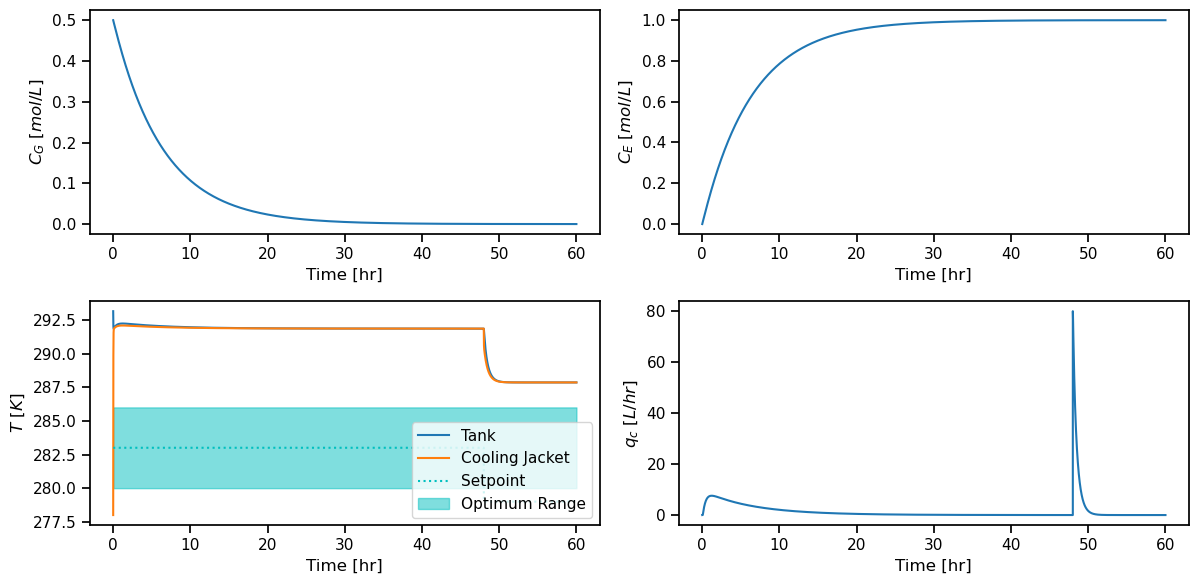

In [5]:
# setpoint temperature function for lager process
def Tsetpoint(t):
    if t <= 48:
        Tsp = 273 + 10
    else:
        Tsp = 273 + 6
    return Tsp
        

# set initial conditions and cooling flow
IC = [C_G0,C_E0,T0,Tci]

# do simulation at fixed time steps dt
dt = 1/1000
ti = 0.0
tf = 60

# control saturation
qc_min = 0                            # minimum possible coolant flowrate
qc_max = 3000                          # maximum possible coolant flowrate
def sat(qc):                          # function to return feasible value of qc
    return max(qc_min,min(qc_max,qc))

# control parameters
kp = 20

# create python list to log results
log = []

# start simulation
C_G,C_E,T,Tc = IC
qc = 0
eP_ = Tsetpoint(0) - T

for t in np.linspace(ti,tf,int((tf-ti)/dt)+1):
    # PID control calculations
    Tsp = Tsetpoint(t)
    e = Tsp - T
    qc -= kp*(e - eP_)  
    qc = sat(qc)
    
    # log data and update state
    log.append([t,C_G,C_E,T,Tc,qc,Tsp])
    C_G,C_E,T,Tc = odeint(deriv,[C_G,C_E,T,Tc],[t,t+dt])[-1]     # start at t, find state at t + dt
    
    eP_ = e

qplot(log)

## Question 3
What happened to the controlled variable at short times and as the fermentation progressed? What about the manipulated variable? Would you recommend this control strategy?

## PI Control: let's see if adding in a term can help...
Obviously not content with the results, the engineer decides to add the integral term into his control algorithm. The integral control term accumulates all of the errors in the previous timesteps and subtracts it from the manipulated variable (MV). In this way, it pushes the CV closer towards the SV by "punishing" large offsets.

The "I term" then defined as follows:

\begin{equation}
K_I \cdot \int^t_0 (T_{sp}-T) dt
\end{equation}

Adding it to the previous P term yields the following PI control:

\begin{equation}
q_c = \bar{q_c} - \left( K_P \cdot (T_{sp}-T) + K_I \cdot \int^t_0 (T_{sp}-T) dt \right)
\end{equation}

Like before, we adjust the PI controller into the "velocity form" to be able to simulate it using discrete time intervals. This calculates the controller setpoint for the water flowrate at the current time ($q_k$), by subtracting the proportional \bf{and} integral control terms from the controller setpoint at the previous time step ($q_{k-1}$). In the "velocity form", the previous timestep error is also used ($e_{k-1}$):

\begin{align}
q_k &= q_{k-1} - K_P \cdot \big[ e_k - e_{k-1} \big] - K_I \cdot \Delta t \cdot e_k\\
q_k &= q_{k-1} - K_P \cdot \big[ (T_{sp}-T_k) - (T_{sp}-T_{k-1}) \big] - K_I \cdot \Delta t \cdot (T_{sp}-T_k)
\end{align}

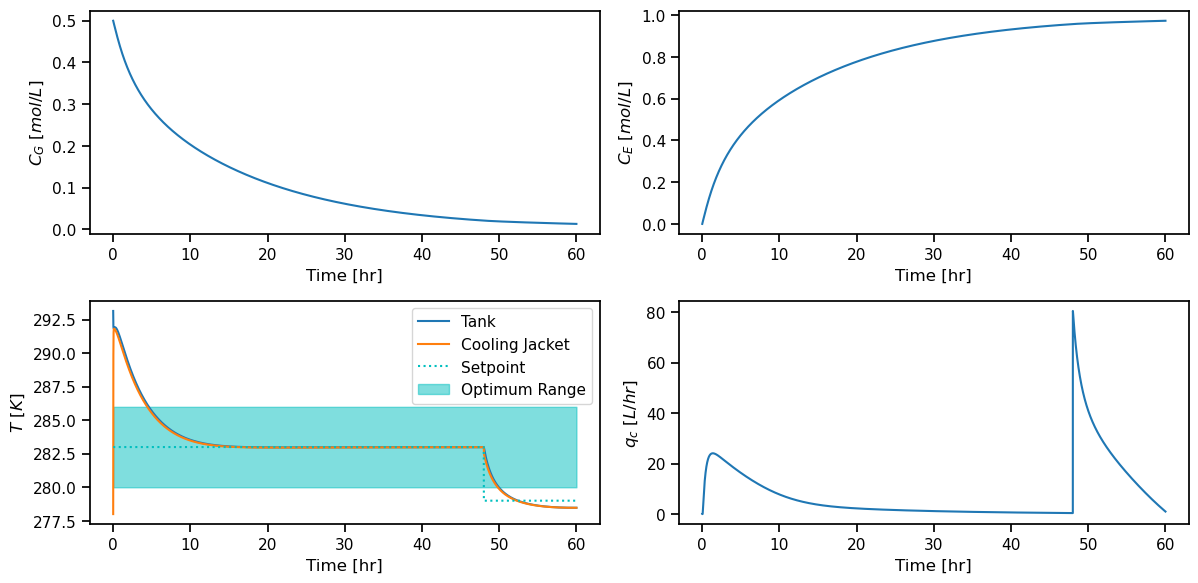

In [6]:
# set initial conditions and cooling flow
IC = [C_G0,C_E0,T0,Tci]

# do simulation at fixed time steps dt
dt = 1/1000
ti = 0.0
tf = 60

# control saturation
qc_min = 0                            # minimum possible coolant flowrate
qc_max = 3000                          # maximum possible coolant flowrate
def sat(qc):                          # function to return feasible value of qc
    return max(qc_min,min(qc_max,qc))

# control parameters
kp = 20
ki = 5

# create python list to log results
log = []

# start simulation
C_G,C_E,T,Tc = IC
qc = 0
eP_ = Tsetpoint(0) - T

for t in np.linspace(ti,tf,int((tf-ti)/dt)+1):
    # PID control calculations
    Tsp = Tsetpoint(t)
    e = Tsp - T
    qc -= kp*(e - eP_) + ki * dt * e 
    qc = sat(qc)
    
    # log data and update state
    log.append([t,C_G,C_E,T,Tc,qc,Tsp])
    C_G,C_E,T,Tc = odeint(deriv,[C_G,C_E,T,Tc],[t,t+dt])[-1]     # start at t, find state at t + dt
    
    eP_ = e
   

qplot(log)

## Question 4
Compare the evolution of tank temperature against question 4. Would you recommend adding the integral term to the controller?

## PID Control: is adding the D term even needed?
The 
Just to check, the engineer runs another experiment, this time by adding the derivative control term into the algorithm. The "D term" is defined as follows:
\begin{equation}
K_D \cdot \frac{d(T_{sp}-T)}{dt}
\end{equation}

Adding it to the PI controller from Question 5, we get the complete expression for the PID controller:

\begin{equation}
q_c = \bar{q_c} - \left( K_P \cdot (T_{sp}-T) + K_I \cdot \int^t_0 (T_{sp}-T) dt + K_D \cdot \frac{d(T_{sp}-T)}{dt} \right)
\end{equation}

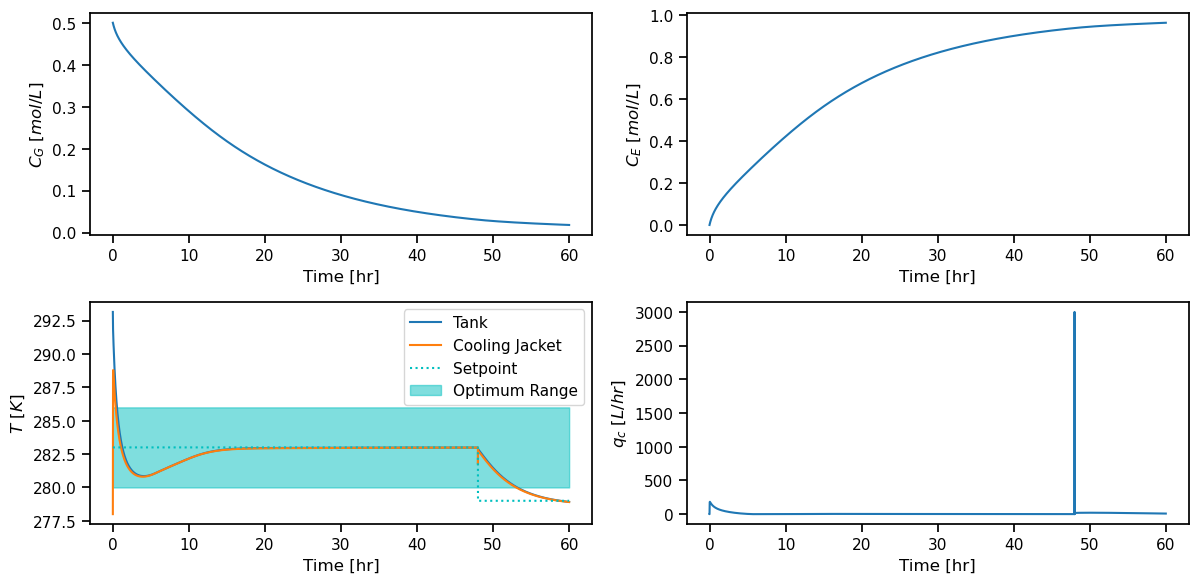

In [7]:
# set initial conditions and cooling flow
IC = [C_G0,C_E0,T0,Tci]

# do simulation at fixed time steps dt
dt = 1/1000
ti = 0.0
tf = 60

# control saturation
qc_min = 0                            # minimum possible coolant flowrate
qc_max = 3000                          # maximum possible coolant flowrate
def sat(qc):                          # function to return feasible value of qc
    return max(qc_min,min(qc_max,qc))

# control parameters
kp = 20
ki = 5
kd = 2.5


# create python list to log results
log = []

# start simulation
C_G,C_E,T,Tc = IC
qc = 0

eP_ = Tsetpoint(0) - T
eD_ = Tsetpoint(0) - T
eD__ = eD_

for t in np.linspace(ti,tf,int((tf-ti)/dt)+1):
    # PID control calculations
    Tsp = Tsetpoint(t)
    eP = Tsp - T
    eI = Tsp - T
    eD = Tsp - T
    qc -= kp*(eP - eP_) + ki*dt*eI + kd*(eD - 2*eD_ + eD__)/dt
    qc = sat(qc)
    
    # log data and update state
    log.append([t,C_G,C_E,T,Tc,qc,Tsp])
    C_G,C_E,T,Tc = odeint(deriv,[C_G,C_E,T,Tc],[t,t+dt])[-1]     # start at t, find state at t + dt
    
    # save data for PID calculations
    eD__,eD_,eP_ = eD_,eD,eP

qplot(log)

## Question 5
### 5a) 
What benefit does the D controller bring to the process?
### 5b)
What potential challenges do you see in implementing this control strategy? (Hint: look at the $q_c$ plot)

## PID Parameter tuning
The engineer is now convinced that the PID controller is the best way to reach the setpoint temperature of $10 ^\circ C$ quickly and wants to tune the parameter $K_P,\ K_I,\ K_D$ such that the tank temperature is cooled down the fastest without over- or under-shooting the setpoint value. Below is a simulation of the first 12 hours of the fermentation where you can adjust the parameters used in the PID.

In [8]:
from ipywidgets import interact

IC = [C_G0,C_E0,T0,Tci]
ti = 0.0
tf = 12.0
dt = 1/1000

def sim(Tsetpoint,kp,ki,kd):
    global Tsp, qc
    Tsp = Tsetpoint

    # create python list to log results
    log = []

    # start simulation
    C_G,C_E,T,Tc = IC
    qc = 0

    eP_ = Tsp - T
    eD_ = Tsp - T
    eD__ = eD_

    for t in np.linspace(ti,tf,int((tf-ti)/dt)+1):
        # PID control calculations
        eP = Tsp - T
        eI = Tsp - T
        eD = Tsp - T
        qc -= kp*(eP - eP_) + ki*dt*eI + kd*(eD - 2*eD_ + eD__)/dt
        qc = sat(qc)

        # log data and update state
        log.append([t,C_G,C_E,T,Tc,qc,Tsp])
        C_G,C_E,T,Tc = odeint(deriv,[C_G,C_E,T,Tc],[t,t+dt])[-1]     # start at t, find state at t + dt
    
        # save data for PID calculations
        eD__ = eD_
        eD_ = eD
        eP_ = eP

    qplot(log)
    
interact(sim,Tsetpoint = (273.15+7,273.15+13),kp = (0,300), ki=(0,100,0.1), kd=(0,50,0.1));

interactive(children=(FloatSlider(value=283.15, description='Tsetpoint', max=286.15, min=280.15), IntSlider(va…

## Question 6
Vary the setpoint temperature and the parameter values. What combination of parameters provides the fastest cooling (less than 2 hours) down to the setpoint for $T_{sp}=10^\circ C$? Is there any noticeable impact on the ethanol concentration upon optimizing these parameters compared to a value of ${K_P = 20.0;\ K_I = 5.0;\ K_D = 2.5}$?